In [1]:
# demo
import numpy as np
from skimage import io
import glob
from measures import compute_ave_MAE_of_methods


## 0. =======set the data path=======
print("------0. set the data path------")

# >>>>>>> Follows have to be manually configured <<<<<<< #
data_name = 'DUT-O' # this will be drawn on the bottom center of the figures
data_dir = 'eval\\' # set the data directory,
                          # ground truth and results to-be-evaluated should be in this directory
                          # the figures of PR and F-measure curves will be saved in this directory as well
gt_dir = 'gt\\'+data_name+'\\gt' # set the ground truth folder name
rs_dirs = ['GateNet-R','ITSD-R','ICON-R','MINet-R','RAS', 'BASNet', 'CPD-R','PoolNet','F3Net','TSPOANet','CSF','Ours-R'] # set the folder names of different methods
                        # 'rs1' contains the result of method1
                        # 'rs2' contains the result of method 2
                        # we suggest to name the folder as the method names because they will be shown in the figures' legend
lineSylClr = ['c:', 'b--','g--','c--','m--','y--','b-','g-','c-','m-','y-','r-'] # curve style, same size with rs_dirs
linewidth = [1,1,1,1,1,1,1,1,1,1,1,2] # line width, same size with rs_dirs
# >>>>>>> Above have to be manually configured <<<<<<< #

gt_name_list = glob.glob(data_dir+gt_dir+'\\'+'*.png') # get the ground truth file name list

## get directory list of predicted maps
rs_dir_lists = []
for i in range(len(rs_dirs)):
    rs_dir_lists.append(data_dir+rs_dirs[i]+'\\'+data_name+'\\')
print('\n')
print(rs_dir_lists)

## 1. =======compute the average MAE of methods=========
print("------1. Compute the average MAE of Methods------")
#aveMAE, gt2rs_mae = compute_ave_MAE_of_methods(gt_name_list,rs_dir_lists)
print('\n')
#for i in range(0,len(rs_dirs)):
#    print('>>%s: num_rs/num_gt-> %d/%d, aveMAE-> %.3f'%(rs_dirs[i], gt2rs_mae[i], len(gt_name_list), aveMAE[i]))


## 2. =======compute the Precision, Recall and F-measure of methods=========
from measures import compute_PRE_REC_FM_of_methods,plot_save_pr_curves,plot_save_fm_curves

print('\n')
print("------2. Compute the Precision, Recall and F-measure of Methods------")
PRE, REC, FM, gt2rs_fm = compute_PRE_REC_FM_of_methods(gt_name_list,rs_dir_lists,beta=0.3)
for i in range(0,FM.shape[0]):
    print(">>", rs_dirs[i],":", "num_rs/num_gt-> %d/%d,"%(int(gt2rs_fm[i][0]),len(gt_name_list)), "maxF->%.3f, "%(np.max(FM,1)[i]), "meanF->%.3f, "%(np.mean(FM,1)[i]))
print('\n')

------0. set the data path------


['eval\\GateNet-R\\DUT-O\\', 'eval\\ITSD-R\\DUT-O\\', 'eval\\ICON-R\\DUT-O\\', 'eval\\MINet-R\\DUT-O\\', 'eval\\RAS\\DUT-O\\', 'eval\\BASNet\\DUT-O\\', 'eval\\CPD-R\\DUT-O\\', 'eval\\PoolNet\\DUT-O\\', 'eval\\F3Net\\DUT-O\\', 'eval\\TSPOANet\\DUT-O\\', 'eval\\CSF\\DUT-O\\', 'eval\\Ours-R\\DUT-O\\']
------1. Compute the average MAE of Methods------




------2. Compute the Precision, Recall and F-measure of Methods------
>>Processed 5168/5168

>> GateNet-R : num_rs/num_gt-> 5168/5168, maxF->0.818,  meanF->0.791, 
>> ITSD-R : num_rs/num_gt-> 5168/5168, maxF->0.821,  meanF->0.793, 
>> ICON-R : num_rs/num_gt-> 5168/5168, maxF->0.825,  meanF->0.801, 
>> MINet-R : num_rs/num_gt-> 5168/5168, maxF->0.810,  meanF->0.789, 
>> RAS : num_rs/num_gt-> 5168/5168, maxF->0.786,  meanF->0.762, 
>> BASNet : num_rs/num_gt-> 5168/5168, maxF->0.805,  meanF->0.791, 
>> CPD-R : num_rs/num_gt-> 5168/5168, maxF->0.797,  meanF->0.781, 
>> PoolNet : num_rs/num_gt-> 5166/5168, ma

------ 3. Plot and save precision-recall curves------


>>PR-curves saved: eval\DUT-O_pr_curves.png


------ 4. Plot and save F-measure curves------
>>F-measure curves saved: eval\DUT-O_fm_curves.png


Done!!!


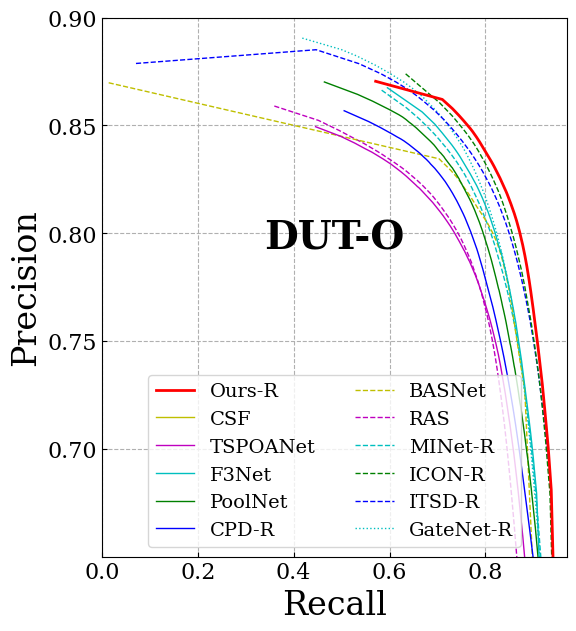

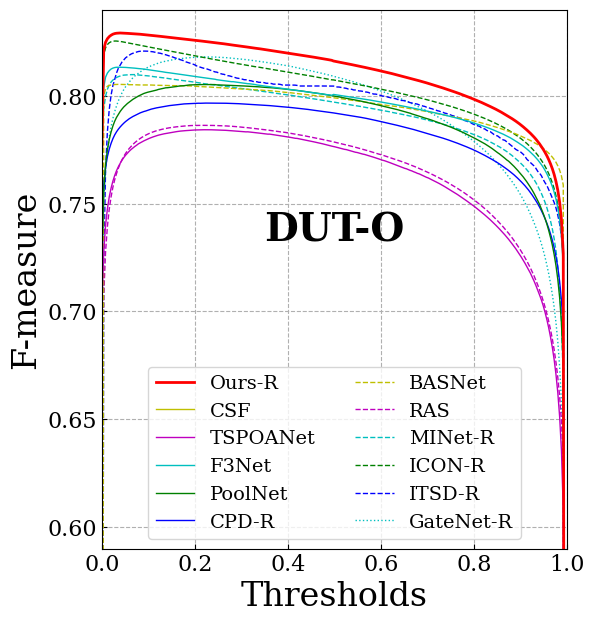

In [8]:
## 3. =======Plot and save precision-recall curves=========
print("------ 3. Plot and save precision-recall curves------")
plot_save_pr_curves(PRE, # numpy array (num_rs_dir,255), num_rs_dir curves will be drawn
                    REC, # numpy array (num_rs_dir,255)
                    method_names = rs_dirs, # method names, shape (num_rs_dir), will be included in the figure legend
                    lineSylClr = lineSylClr, # curve styles, shape (num_rs_dir)
                    linewidth = linewidth, # curve width, shape (num_rs_dir)
                    xrange = (0,0.97), # the showing range of x-axis
                    yrange = (0.65,0.9), # the showing range of y-axis
                    dataset_name = data_name, # dataset name will be drawn on the bottom center position
                    save_dir = data_dir, # figure save directory
                    save_fmt = 'png') # format of the to-be-saved figure
print('\n')

## 4. =======Plot and save F-measure curves=========
print("------ 4. Plot and save F-measure curves------")

plot_save_fm_curves(FM, # numpy array (num_rs_dir,255), num_rs_dir curves will be drawn
                    mybins = np.arange(0,256),
                    method_names = rs_dirs, # method names, shape (num_rs_dir), will be included in the figure legend
                    lineSylClr = lineSylClr, # curve styles, shape (num_rs_dir)
                    linewidth = linewidth, # curve width, shape (num_rs_dir)
                    xrange = (0.0,1.0), # the showing range of x-axis
                    yrange = (0.59,0.84), # the showing range of y-axis
                    dataset_name = data_name, # dataset name will be drawn on the bottom center position
                    save_dir = data_dir, # figure save directory
                    save_fmt = 'png') # format of the to-be-saved figure
print('\n')

print('Done!!!')


In [2]:
# demo
import numpy as np
from skimage import io
import glob
from measures import compute_ave_MAE_of_methods


## 0. =======set the data path=======
print("------0. set the data path------")

# >>>>>>> Follows have to be manually configured <<<<<<< #
data_name = 'DUTS' # this will be drawn on the bottom center of the figures
data_dir = 'eval\\' # set the data directory,
                          # ground truth and results to-be-evaluated should be in this directory
                          # the figures of PR and F-measure curves will be saved in this directory as well
gt_dir = 'gt\\'+data_name+'\\gt' # set the ground truth folder name
rs_dirs = ['GateNet-R','ITSD-R','ICON-R','MINet-R','RAS', 'BASNet', 'CPD-R','PoolNet','F3Net','TSPOANet','CSF','Ours-R'] # set the folder names of different methods
                        # 'rs1' contains the result of method1
                        # 'rs2' contains the result of method 2
                        # we suggest to name the folder as the method names because they will be shown in the figures' legend
lineSylClr = ['c:', 'b--','g--','c--','m--','y--','b-','g-','c-','m-','y-','r-'] # curve style, same size with rs_dirs
linewidth = [1,1,1,1,1,1,1,1,1,1,1,2] # line width, same size with rs_dirs
# >>>>>>> Above have to be manually configured <<<<<<< #

gt_name_list = glob.glob(data_dir+gt_dir+'\\'+'*.png') # get the ground truth file name list

## get directory list of predicted maps
rs_dir_lists = []
for i in range(len(rs_dirs)):
    rs_dir_lists.append(data_dir+rs_dirs[i]+'\\'+data_name+'\\')
print('\n')
print(rs_dir_lists)

## 1. =======compute the average MAE of methods=========
print("------1. Compute the average MAE of Methods------")
#aveMAE, gt2rs_mae = compute_ave_MAE_of_methods(gt_name_list,rs_dir_lists)
print('\n')
#for i in range(0,len(rs_dirs)):
#    print('>>%s: num_rs/num_gt-> %d/%d, aveMAE-> %.3f'%(rs_dirs[i], gt2rs_mae[i], len(gt_name_list), aveMAE[i]))


## 2. =======compute the Precision, Recall and F-measure of methods=========
from measures import compute_PRE_REC_FM_of_methods,plot_save_pr_curves,plot_save_fm_curves

print('\n')
print("------2. Compute the Precision, Recall and F-measure of Methods------")
PRE, REC, FM, gt2rs_fm = compute_PRE_REC_FM_of_methods(gt_name_list,rs_dir_lists,beta=0.3)
for i in range(0,FM.shape[0]):
    print(">>", rs_dirs[i],":", "num_rs/num_gt-> %d/%d,"%(int(gt2rs_fm[i][0]),len(gt_name_list)), "maxF->%.3f, "%(np.max(FM,1)[i]), "meanF->%.3f, "%(np.mean(FM,1)[i]))
print('\n')

------0. set the data path------


['eval\\GateNet-R\\DUTS\\', 'eval\\ITSD-R\\DUTS\\', 'eval\\ICON-R\\DUTS\\', 'eval\\MINet-R\\DUTS\\', 'eval\\RAS\\DUTS\\', 'eval\\BASNet\\DUTS\\', 'eval\\CPD-R\\DUTS\\', 'eval\\PoolNet\\DUTS\\', 'eval\\F3Net\\DUTS\\', 'eval\\TSPOANet\\DUTS\\', 'eval\\CSF\\DUTS\\', 'eval\\Ours-R\\DUTS\\']
------1. Compute the average MAE of Methods------




------2. Compute the Precision, Recall and F-measure of Methods------
ERROR: The shapes of gt and mask are different!
ILSVRC2012_test_00036002.png eval\ICON-R\DUTS\ILSVRC2012_test_00036002.png
ERROR: The shapes of gt and mask are different!
sun_bcogaqperiljqupq.png eval\ICON-R\DUTS\sun_bcogaqperiljqupq.png
>>Processed 5019/5019

>> GateNet-R : num_rs/num_gt-> 5017/5019, maxF->0.888,  meanF->0.856, 
>> ITSD-R : num_rs/num_gt-> 5019/5019, maxF->0.883,  meanF->0.855, 
>> ICON-R : num_rs/num_gt-> 5019/5019, maxF->0.892,  meanF->0.866, 
>> MINet-R : num_rs/num_gt-> 5017/5019, maxF->0.884,  meanF->0.860, 
>> RAS : num_rs/

------ 3. Plot and save precision-recall curves------


>>PR-curves saved: eval\DUTS_pr_curves.pdf


------ 4. Plot and save F-measure curves------
>>F-measure curves saved: eval\DUTS_fm_curves.pdf


Done!!!


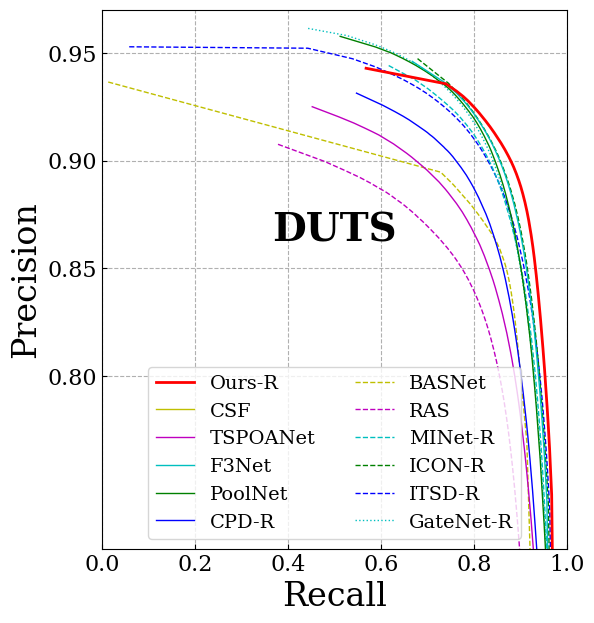

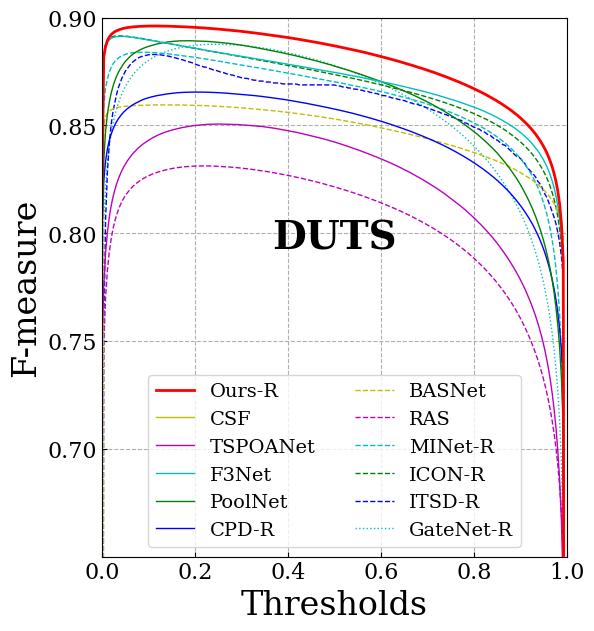

In [7]:
from measures import compute_PRE_REC_FM_of_methods,plot_save_pr_curves,plot_save_fm_curves

## 3. =======Plot and save precision-recall curves=========
print("------ 3. Plot and save precision-recall curves------")
plot_save_pr_curves(PRE, # numpy array (num_rs_dir,255), num_rs_dir curves will be drawn
                    REC, # numpy array (num_rs_dir,255)
                    method_names = rs_dirs, # method names, shape (num_rs_dir), will be included in the figure legend
                    lineSylClr = lineSylClr, # curve styles, shape (num_rs_dir)
                    linewidth = linewidth, # curve width, shape (num_rs_dir)
                    xrange = (0,1), # the showing range of x-axis
                    yrange = (0.72,0.97), # the showing range of y-axis
                    dataset_name = data_name, # dataset name will be drawn on the bottom center position
                    save_dir = data_dir, # figure save directory
                    save_fmt = 'pdf') # format of the to-be-saved figure
print('\n')

## 4. =======Plot and save F-measure curves=========
print("------ 4. Plot and save F-measure curves------")

plot_save_fm_curves(FM, # numpy array (num_rs_dir,255), num_rs_dir curves will be drawn
                    mybins = np.arange(0,256),
                    method_names = rs_dirs, # method names, shape (num_rs_dir), will be included in the figure legend
                    lineSylClr = lineSylClr, # curve styles, shape (num_rs_dir)
                    linewidth = linewidth, # curve width, shape (num_rs_dir)
                    xrange = (0.0,1.0), # the showing range of x-axis
                    yrange = (0.65,0.9), # the showing range of y-axis
                    dataset_name = data_name, # dataset name will be drawn on the bottom center position
                    save_dir = data_dir, # figure save directory
                    save_fmt = 'pdf') # format of the to-be-saved figure
print('\n')

print('Done!!!')


In [11]:
# demo
import numpy as np
from skimage import io
import glob
from measures import compute_ave_MAE_of_methods


## 0. =======set the data path=======
print("------0. set the data path------")

# >>>>>>> Follows have to be manually configured <<<<<<< #
data_name = 'ECSSD' # this will be drawn on the bottom center of the figures
data_dir = 'eval\\' # set the data directory,
                          # ground truth and results to-be-evaluated should be in this directory
                          # the figures of PR and F-measure curves will be saved in this directory as well
gt_dir = 'gt\\'+data_name+'\\gt' # set the ground truth folder name
rs_dirs = ['GateNet-R','ITSD-R','ICON-R','MINet-R','RAS', 'BASNet', 'CPD-R','PoolNet','F3Net','TSPOANet','CSF','Ours-R'] # set the folder names of different methods
                        # 'rs1' contains the result of method1
                        # 'rs2' contains the result of method 2
                        # we suggest to name the folder as the method names because they will be shown in the figures' legend
lineSylClr = ['c:', 'b--','g--','c--','m--','y--','b-','g-','c-','m-','y-','r-'] # curve style, same size with rs_dirs
linewidth = [1,1,1,1,1,1,1,1,1,1,1,2] # line width, same size with rs_dirs
# >>>>>>> Above have to be manually configured <<<<<<< #

gt_name_list = glob.glob(data_dir+gt_dir+'\\'+'*.png') # get the ground truth file name list

## get directory list of predicted maps
rs_dir_lists = []
for i in range(len(rs_dirs)):
    rs_dir_lists.append(data_dir+rs_dirs[i]+'\\'+data_name+'\\')
print('\n')
print(rs_dir_lists)

## 1. =======compute the average MAE of methods=========
print("------1. Compute the average MAE of Methods------")
#aveMAE, gt2rs_mae = compute_ave_MAE_of_methods(gt_name_list,rs_dir_lists)
print('\n')
#for i in range(0,len(rs_dirs)):
#    print('>>%s: num_rs/num_gt-> %d/%d, aveMAE-> %.3f'%(rs_dirs[i], gt2rs_mae[i], len(gt_name_list), aveMAE[i]))


## 2. =======compute the Precision, Recall and F-measure of methods=========
from measures import compute_PRE_REC_FM_of_methods,plot_save_pr_curves,plot_save_fm_curves

print('\n')
print("------2. Compute the Precision, Recall and F-measure of Methods------")
PRE, REC, FM, gt2rs_fm = compute_PRE_REC_FM_of_methods(gt_name_list,rs_dir_lists,beta=0.3)
for i in range(0,FM.shape[0]):
    print(">>", rs_dirs[i],":", "num_rs/num_gt-> %d/%d,"%(int(gt2rs_fm[i][0]),len(gt_name_list)), "maxF->%.3f, "%(np.max(FM,1)[i]), "meanF->%.3f, "%(np.mean(FM,1)[i]))
print('\n')

------0. set the data path------


['eval\\GateNet-R\\ECSSD\\', 'eval\\ITSD-R\\ECSSD\\', 'eval\\ICON-R\\ECSSD\\', 'eval\\MINet-R\\ECSSD\\', 'eval\\RAS\\ECSSD\\', 'eval\\BASNet\\ECSSD\\', 'eval\\CPD-R\\ECSSD\\', 'eval\\PoolNet\\ECSSD\\', 'eval\\F3Net\\ECSSD\\', 'eval\\TSPOANet\\ECSSD\\', 'eval\\CSF\\ECSSD\\', 'eval\\Ours-R\\ECSSD\\']
------1. Compute the average MAE of Methods------




------2. Compute the Precision, Recall and F-measure of Methods------
>>Processed 1000/1000

>> GateNet-R : num_rs/num_gt-> 1000/1000, maxF->0.945,  meanF->0.925, 
>> ITSD-R : num_rs/num_gt-> 1000/1000, maxF->0.947,  meanF->0.929, 
>> ICON-R : num_rs/num_gt-> 1000/1000, maxF->0.950,  meanF->0.934, 
>> MINet-R : num_rs/num_gt-> 1000/1000, maxF->0.947,  meanF->0.931, 
>> RAS : num_rs/num_gt-> 1000/1000, maxF->0.921,  meanF->0.901, 
>> BASNet : num_rs/num_gt-> 1000/1000, maxF->0.942,  meanF->0.927, 
>> CPD-R : num_rs/num_gt-> 1000/1000, maxF->0.939,  meanF->0.924, 
>> PoolNet : num_rs/num_gt-> 1000/1000, ma

------ 3. Plot and save precision-recall curves------


>>PR-curves saved: eval\ECSSD_pr_curves.png


------ 4. Plot and save F-measure curves------
>>F-measure curves saved: eval\ECSSD_fm_curves.png


Done!!!


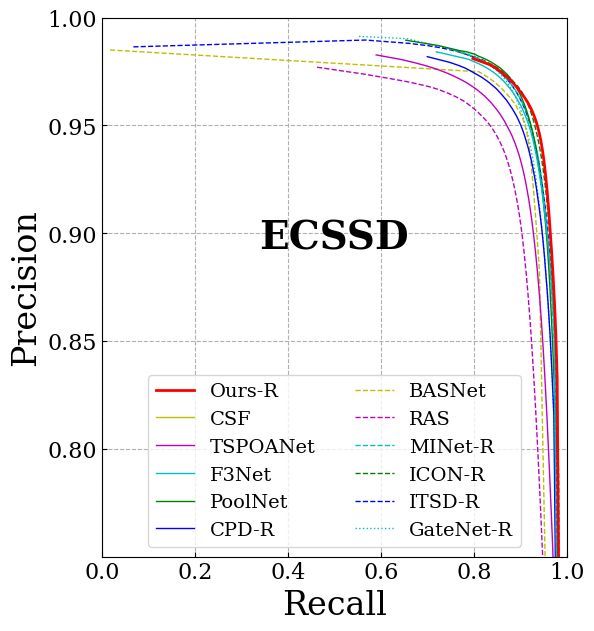

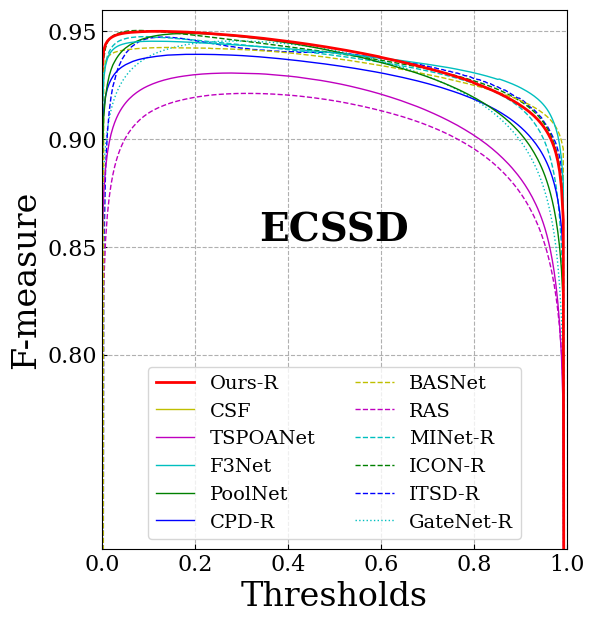

In [12]:
from measures import compute_PRE_REC_FM_of_methods,plot_save_pr_curves,plot_save_fm_curves

## 3. =======Plot and save precision-recall curves=========
print("------ 3. Plot and save precision-recall curves------")
plot_save_pr_curves(PRE, # numpy array (num_rs_dir,255), num_rs_dir curves will be drawn
                    REC, # numpy array (num_rs_dir,255)
                    method_names = rs_dirs, # method names, shape (num_rs_dir), will be included in the figure legend
                    lineSylClr = lineSylClr, # curve styles, shape (num_rs_dir)
                    linewidth = linewidth, # curve width, shape (num_rs_dir)
                    xrange = (0,1), # the showing range of x-axis
                    yrange = (0.75,1), # the showing range of y-axis
                    dataset_name = data_name, # dataset name will be drawn on the bottom center position
                    save_dir = data_dir, # figure save directory
                    save_fmt = 'png') # format of the to-be-saved figure
print('\n')

## 4. =======Plot and save F-measure curves=========
print("------ 4. Plot and save F-measure curves------")

plot_save_fm_curves(FM, # numpy array (num_rs_dir,255), num_rs_dir curves will be drawn
                    mybins = np.arange(0,256),
                    method_names = rs_dirs, # method names, shape (num_rs_dir), will be included in the figure legend
                    lineSylClr = lineSylClr, # curve styles, shape (num_rs_dir)
                    linewidth = linewidth, # curve width, shape (num_rs_dir)
                    xrange = (0.0,1.0), # the showing range of x-axis
                    yrange = (0.71,0.96), # the showing range of y-axis
                    dataset_name = data_name, # dataset name will be drawn on the bottom center position
                    save_dir = data_dir, # figure save directory
                    save_fmt = 'png') # format of the to-be-saved figure
print('\n')

print('Done!!!')


In [13]:
# demo
import numpy as np
from skimage import io
import glob
from measures import compute_ave_MAE_of_methods


## 0. =======set the data path=======
print("------0. set the data path------")

# >>>>>>> Follows have to be manually configured <<<<<<< #
data_name = 'HKU-IS' # this will be drawn on the bottom center of the figures
data_dir = 'eval\\' # set the data directory,
                          # ground truth and results to-be-evaluated should be in this directory
                          # the figures of PR and F-measure curves will be saved in this directory as well
gt_dir = 'gt\\'+data_name+'\\gt' # set the ground truth folder name
rs_dirs = ['GateNet-R','ITSD-R','ICON-R','MINet-R','RAS', 'BASNet', 'CPD-R','PoolNet','F3Net','TSPOANet','CSF','Ours-R'] # set the folder names of different methods
                        # 'rs1' contains the result of method1
                        # 'rs2' contains the result of method 2
                        # we suggest to name the folder as the method names because they will be shown in the figures' legend
lineSylClr = ['c:', 'b--','g--','c--','m--','y--','b-','g-','c-','m-','y-','r-'] # curve style, same size with rs_dirs
linewidth = [1,1,1,1,1,1,1,1,1,1,1,2] # line width, same size with rs_dirs
# >>>>>>> Above have to be manually configured <<<<<<< #

gt_name_list = glob.glob(data_dir+gt_dir+'\\'+'*.png') # get the ground truth file name list

## get directory list of predicted maps
rs_dir_lists = []
for i in range(len(rs_dirs)):
    rs_dir_lists.append(data_dir+rs_dirs[i]+'\\'+data_name+'\\')
print('\n')
print(rs_dir_lists)

## 1. =======compute the average MAE of methods=========
print("------1. Compute the average MAE of Methods------")
#aveMAE, gt2rs_mae = compute_ave_MAE_of_methods(gt_name_list,rs_dir_lists)
print('\n')
#for i in range(0,len(rs_dirs)):
#    print('>>%s: num_rs/num_gt-> %d/%d, aveMAE-> %.3f'%(rs_dirs[i], gt2rs_mae[i], len(gt_name_list), aveMAE[i]))


## 2. =======compute the Precision, Recall and F-measure of methods=========
from measures import compute_PRE_REC_FM_of_methods,plot_save_pr_curves,plot_save_fm_curves

print('\n')
print("------2. Compute the Precision, Recall and F-measure of Methods------")
PRE, REC, FM, gt2rs_fm = compute_PRE_REC_FM_of_methods(gt_name_list,rs_dir_lists,beta=0.3)
for i in range(0,FM.shape[0]):
    print(">>", rs_dirs[i],":", "num_rs/num_gt-> %d/%d,"%(int(gt2rs_fm[i][0]),len(gt_name_list)), "maxF->%.3f, "%(np.max(FM,1)[i]), "meanF->%.3f, "%(np.mean(FM,1)[i]))
print('\n')

------0. set the data path------


['eval\\GateNet-R\\HKU-IS\\', 'eval\\ITSD-R\\HKU-IS\\', 'eval\\ICON-R\\HKU-IS\\', 'eval\\MINet-R\\HKU-IS\\', 'eval\\RAS\\HKU-IS\\', 'eval\\BASNet\\HKU-IS\\', 'eval\\CPD-R\\HKU-IS\\', 'eval\\PoolNet\\HKU-IS\\', 'eval\\F3Net\\HKU-IS\\', 'eval\\TSPOANet\\HKU-IS\\', 'eval\\CSF\\HKU-IS\\', 'eval\\Ours-R\\HKU-IS\\']
------1. Compute the average MAE of Methods------




------2. Compute the Precision, Recall and F-measure of Methods------
>>Processed 4447/4447

>> GateNet-R : num_rs/num_gt-> 4447/4447, maxF->0.933,  meanF->0.910, 
>> ITSD-R : num_rs/num_gt-> 4447/4447, maxF->0.934,  meanF->0.911, 
>> ICON-R : num_rs/num_gt-> 4445/4447, maxF->0.939,  meanF->0.920, 
>> MINet-R : num_rs/num_gt-> 4447/4447, maxF->0.935,  meanF->0.917, 
>> RAS : num_rs/num_gt-> 1447/4447, maxF->0.913,  meanF->0.888, 
>> BASNet : num_rs/num_gt-> 4447/4447, maxF->0.928,  meanF->0.911, 
>> CPD-R : num_rs/num_gt-> 4447/4447, maxF->0.925,  meanF->0.905, 
>> PoolNet : num_rs/num_gt-> 1

------ 3. Plot and save precision-recall curves------


>>PR-curves saved: eval\HKU-IS_pr_curves.pdf


------ 4. Plot and save F-measure curves------
>>F-measure curves saved: eval\HKU-IS_fm_curves.pdf


Done!!!


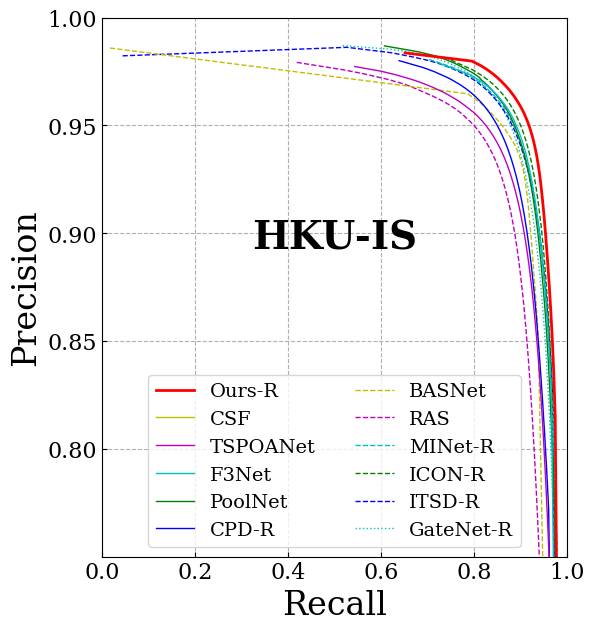

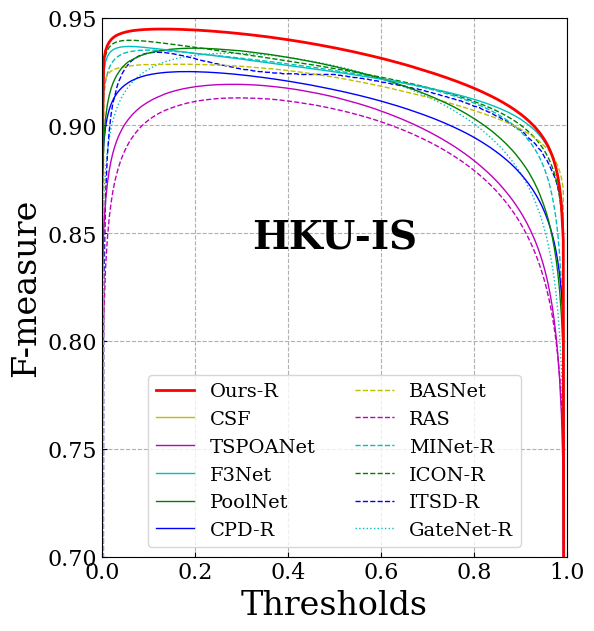

In [15]:
from measures import compute_PRE_REC_FM_of_methods,plot_save_pr_curves,plot_save_fm_curves

## 3. =======Plot and save precision-recall curves=========
print("------ 3. Plot and save precision-recall curves------")
plot_save_pr_curves(PRE, # numpy array (num_rs_dir,255), num_rs_dir curves will be drawn
                    REC, # numpy array (num_rs_dir,255)
                    method_names = rs_dirs, # method names, shape (num_rs_dir), will be included in the figure legend
                    lineSylClr = lineSylClr, # curve styles, shape (num_rs_dir)
                    linewidth = linewidth, # curve width, shape (num_rs_dir)
                    xrange = (0,1), # the showing range of x-axis
                    yrange = (0.75,1), # the showing range of y-axis
                    dataset_name = data_name, # dataset name will be drawn on the bottom center position
                    save_dir = data_dir, # figure save directory
                    save_fmt = 'pdf') # format of the to-be-saved figure
print('\n')

## 4. =======Plot and save F-measure curves=========
print("------ 4. Plot and save F-measure curves------")

plot_save_fm_curves(FM, # numpy array (num_rs_dir,255), num_rs_dir curves will be drawn
                    mybins = np.arange(0,256),
                    method_names = rs_dirs, # method names, shape (num_rs_dir), will be included in the figure legend
                    lineSylClr = lineSylClr, # curve styles, shape (num_rs_dir)
                    linewidth = linewidth, # curve width, shape (num_rs_dir)
                    xrange = (0.0,1.0), # the showing range of x-axis
                    yrange = (0.7,0.95), # the showing range of y-axis
                    dataset_name = data_name, # dataset name will be drawn on the bottom center position
                    save_dir = data_dir, # figure save directory
                    save_fmt = 'pdf') # format of the to-be-saved figure
print('\n')

print('Done!!!')


In [16]:
# demo
import numpy as np
from skimage import io
import glob
from measures import compute_ave_MAE_of_methods


## 0. =======set the data path=======
print("------0. set the data path------")

# >>>>>>> Follows have to be manually configured <<<<<<< #
data_name = 'PASCAL-S' # this will be drawn on the bottom center of the figures
data_dir = 'eval\\' # set the data directory,
                          # ground truth and results to-be-evaluated should be in this directory
                          # the figures of PR and F-measure curves will be saved in this directory as well
gt_dir = 'gt\\'+data_name+'\\gt' # set the ground truth folder name
rs_dirs = ['GateNet-R','ITSD-R','ICON-R','MINet-R','RAS', 'BASNet', 'CPD-R','PoolNet','F3Net','TSPOANet','CSF','Ours-R'] # set the folder names of different methods
                        # 'rs1' contains the result of method1
                        # 'rs2' contains the result of method 2
                        # we suggest to name the folder as the method names because they will be shown in the figures' legend
lineSylClr = ['c:', 'b--','g--','c--','m--','y--','b-','g-','c-','m-','y-','r-'] # curve style, same size with rs_dirs
linewidth = [1,1,1,1,1,1,1,1,1,1,1,2] # line width, same size with rs_dirs
# >>>>>>> Above have to be manually configured <<<<<<< #

gt_name_list = glob.glob(data_dir+gt_dir+'\\'+'*.png') # get the ground truth file name list

## get directory list of predicted maps
rs_dir_lists = []
for i in range(len(rs_dirs)):
    rs_dir_lists.append(data_dir+rs_dirs[i]+'\\'+data_name+'\\')
print('\n')
print(rs_dir_lists)

## 1. =======compute the average MAE of methods=========
print("------1. Compute the average MAE of Methods------")
#aveMAE, gt2rs_mae = compute_ave_MAE_of_methods(gt_name_list,rs_dir_lists)
print('\n')
#for i in range(0,len(rs_dirs)):
#    print('>>%s: num_rs/num_gt-> %d/%d, aveMAE-> %.3f'%(rs_dirs[i], gt2rs_mae[i], len(gt_name_list), aveMAE[i]))


## 2. =======compute the Precision, Recall and F-measure of methods=========
from measures import compute_PRE_REC_FM_of_methods,plot_save_pr_curves,plot_save_fm_curves

print('\n')
print("------2. Compute the Precision, Recall and F-measure of Methods------")
PRE, REC, FM, gt2rs_fm = compute_PRE_REC_FM_of_methods(gt_name_list,rs_dir_lists,beta=0.3)
for i in range(0,FM.shape[0]):
    print(">>", rs_dirs[i],":", "num_rs/num_gt-> %d/%d,"%(int(gt2rs_fm[i][0]),len(gt_name_list)), "maxF->%.3f, "%(np.max(FM,1)[i]), "meanF->%.3f, "%(np.mean(FM,1)[i]))
print('\n')

------0. set the data path------


['eval\\GateNet-R\\PASCAL-S\\', 'eval\\ITSD-R\\PASCAL-S\\', 'eval\\ICON-R\\PASCAL-S\\', 'eval\\MINet-R\\PASCAL-S\\', 'eval\\RAS\\PASCAL-S\\', 'eval\\BASNet\\PASCAL-S\\', 'eval\\CPD-R\\PASCAL-S\\', 'eval\\PoolNet\\PASCAL-S\\', 'eval\\F3Net\\PASCAL-S\\', 'eval\\TSPOANet\\PASCAL-S\\', 'eval\\CSF\\PASCAL-S\\', 'eval\\Ours-R\\PASCAL-S\\']
------1. Compute the average MAE of Methods------




------2. Compute the Precision, Recall and F-measure of Methods------
>>Processed 850/850

>> GateNet-R : num_rs/num_gt-> 850/850, maxF->0.880,  meanF->0.857, 
>> ITSD-R : num_rs/num_gt-> 850/850, maxF->0.880,  meanF->0.856, 
>> ICON-R : num_rs/num_gt-> 850/850, maxF->0.887,  meanF->0.863, 
>> MINet-R : num_rs/num_gt-> 850/850, maxF->0.878,  meanF->0.858, 
>> RAS : num_rs/num_gt-> 850/850, maxF->0.835,  meanF->0.819, 
>> BASNet : num_rs/num_gt-> 850/850, maxF->0.860,  meanF->0.841, 
>> CPD-R : num_rs/num_gt-> 850/850, maxF->0.869,  meanF->0.851, 
>> PoolNet : num_rs/nu

------ 3. Plot and save precision-recall curves------


>>PR-curves saved: eval\PASCAL-S_pr_curves.png


------ 4. Plot and save F-measure curves------
>>F-measure curves saved: eval\PASCAL-S_fm_curves.png


Done!!!


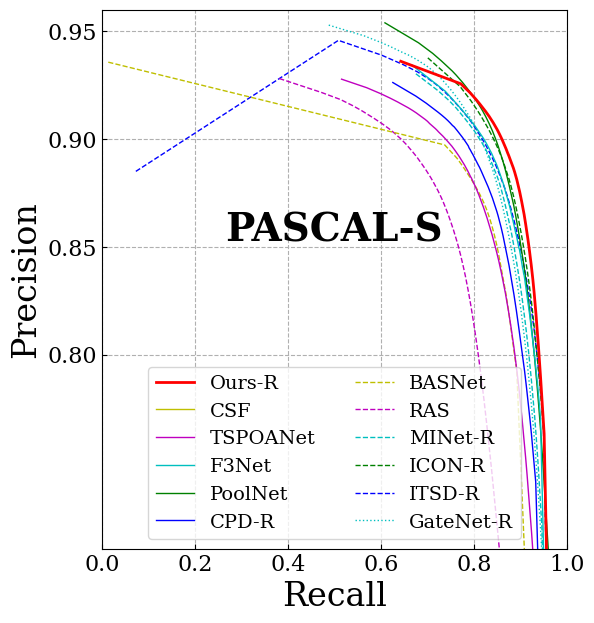

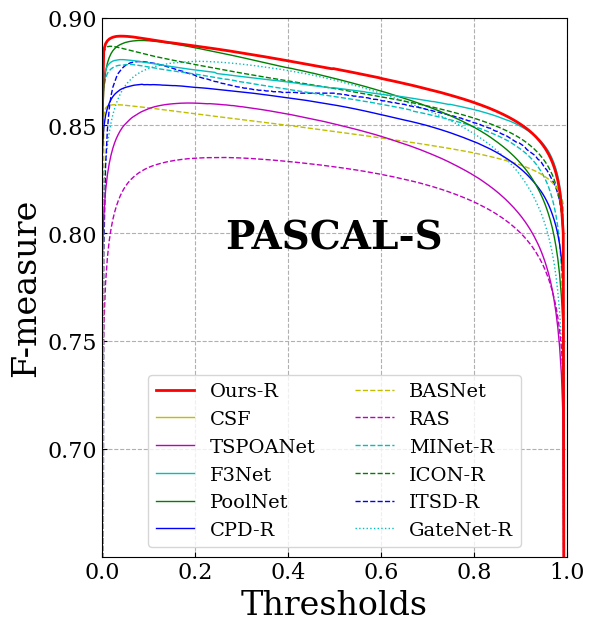

In [18]:
from measures import compute_PRE_REC_FM_of_methods,plot_save_pr_curves,plot_save_fm_curves

## 3. =======Plot and save precision-recall curves=========
print("------ 3. Plot and save precision-recall curves------")
plot_save_pr_curves(PRE, # numpy array (num_rs_dir,255), num_rs_dir curves will be drawn
                    REC, # numpy array (num_rs_dir,255)
                    method_names = rs_dirs, # method names, shape (num_rs_dir), will be included in the figure legend
                    lineSylClr = lineSylClr, # curve styles, shape (num_rs_dir)
                    linewidth = linewidth, # curve width, shape (num_rs_dir)
                    xrange = (0,1), # the showing range of x-axis
                    yrange = (0.71,0.96), # the showing range of y-axis
                    dataset_name = data_name, # dataset name will be drawn on the bottom center position
                    save_dir = data_dir, # figure save directory
                    save_fmt = 'png') # format of the to-be-saved figure
print('\n')

## 4. =======Plot and save F-measure curves=========
print("------ 4. Plot and save F-measure curves------")

plot_save_fm_curves(FM, # numpy array (num_rs_dir,255), num_rs_dir curves will be drawn
                    mybins = np.arange(0,256),
                    method_names = rs_dirs, # method names, shape (num_rs_dir), will be included in the figure legend
                    lineSylClr = lineSylClr, # curve styles, shape (num_rs_dir)
                    linewidth = linewidth, # curve width, shape (num_rs_dir)
                    xrange = (0.0,1.0), # the showing range of x-axis
                    yrange = (0.65,0.9), # the showing range of y-axis
                    dataset_name = data_name, # dataset name will be drawn on the bottom center position
                    save_dir = data_dir, # figure save directory
                    save_fmt = 'png') # format of the to-be-saved figure
print('\n')

print('Done!!!')
